## Лабораторная работа 2
Реализовать методы простой итерации и Ньютона решения систем нелинейных уравнений в виде программного кода, задавая в качестве входных данных точность вычислений. С использованием разработанного программного обеспечения решить систему нелинейных уравнений (при наличии нескольких решений найти то из них, в котором значения неизвестных являются положительными); начальное приближение определить графически. Проанализировать зависимость погрешности вычислений от количества итераций

Введите эпсилон: 0.0001



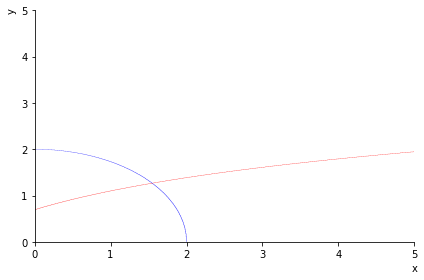

Метод Ньютона:
Ответ: [1.54799144357665, 1.26638165282567]
Количество итераций: 3
------------------------------------------
Функция phi для точки :
phi(x) = sqrt(2**x + 2)
Следовательно, ДУ phi: 2**x*log(2)/(2*sqrt(2**x + 2))
Решая это уравнение для 1 корня, получим, что ДУ phi = 0.456692625372103 < 1
Решая это уравнение для 2 корня, получим, что ДУ phi = 0.397203475396366 < 1

Метод простой итерации:
Ответ: [1.547977787408537, 1.2663778038326219]
Количество итераций: 7


In [9]:
import sympy as sp
import numpy as np

x, y = sp.symbols('x, y')

def newton(f1, f2, intX, intY, eps):
    df1_x = sp.diff(f1, x)
    df1_y = sp.diff(f1, y)
    df2_x = sp.diff(f2, x)
    df2_y = sp.diff(f2, y)
    x_old = (intX[0] + intX[1]) / 2
    y_old = (intY[0] + intY[1]) / 2

    iters = 0
    while True:
        f1_k = f1.evalf(subs = {x: x_old, y: y_old})
        f2_k = f2.evalf(subs = {x: x_old, y: y_old})
        df1_x_k = df1_x.evalf(subs = {x: x_old, y: y_old})
        df1_y_k = df1_y.evalf(subs = {x: x_old, y: y_old})
        df2_x_k = df2_x.evalf(subs = {x: x_old, y: y_old})
        df2_y_k = df2_y.evalf(subs = {x: x_old, y: y_old})
        A1 = sp.Matrix([[f1_k, df1_y_k],
                        [f2_k, df2_y_k]])
        A2 = sp.Matrix([[df1_x_k, f1_k],
                        [df2_x_k, f2_k]])
        J = sp.Matrix([[df1_x_k, df1_y_k],
                       [df2_x_k, df2_y_k]])

        x_new = x_old - A1.det() / J.det()
        y_new = y_old - A2.det() / J.det()

        check_x = abs(x_new - x_old)
        check_y = abs(y_new - y_old)
        check = max(check_x, check_y)
        if check <= eps:
            break

        x_old, y_old = x_new, y_new
        iters += 1

    return [x_new, y_new], iters


def simple_iteration(eps):
    x0 = 1.5 
    y0 = 0.5  
    iter_count = 0  

    while True:
        x = np.sqrt(4 - y0 ** 2)
        y = np.log(x + 2)
        
        if np.abs(x - x0) < eps and np.abs(y - y0) < eps:
            break
            
        x0 = x
        y0 = y

        iter_count += 1
    return [x, y], iter_count

f1 = x**2 + y**2 - 4
f2 = x - sp.exp(y) + 2

epsilon = float(input("Введите эпсилон: "))
print()

interval1 = [1, 2]  # интервал для первой точки

p1 = sp.plot_implicit(sp.Eq(f1, 0), (x, 0, 5), (y, 0, 5), line_color='b', show=False)
p2 = sp.plot_implicit(sp.Eq(f2, 0), (x, 0, 5), (y, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.show()


print("Метод Ньютона:")
Xfirst, k = newton(f1, f2, interval1, interval1, epsilon)
print("Ответ: {0}\nКоличество итераций: {1}".format(Xfirst, k))
print('------------------------------------------')

x = sp.Symbol('x')
t = sp.Symbol('t')
forx = 2**x
for2 = x**2 - 2
newfor = for2.subs(x, t)
phir = sp.solve(sp.Eq(forx - newfor, 0), t)[1]
print("Функция phi для точки :\nphi(x) = {0}".format(phir))
dphi = sp.diff(phir, x)
print("Следовательно, ДУ phi: {0}".format(dphi))
root1 = sp.simplify(dphi.subs(x, Xfirst[0]))
root2 = sp.simplify(dphi.subs(x, Xfirst[1]))
print("Решая это уравнение для 1 корня, получим, что ДУ phi = {0} < 1".format(root1))
print("Решая это уравнение для 2 корня, получим, что ДУ phi = {0} < 1\n".format(root2))

Xsecond, k_s = simple_iteration(epsilon)
print("Метод простой итерации:")
print("Ответ: {0}\nКоличество итераций: {1}".format(Xsecond, k_s))